# 1. Perkenalan

Nama : Monica M. Pratiwi

Batch : FTDS-016-RMT

Gambaran Besar Dataset : Uber and Lyft Dataset Boston, MA

Objective : Memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan

# 2. Import Libraries

In [1]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.2.0-cp39-cp39-macosx_12_0_arm64.whl (8.3 MB)
  Using cached scipy-1.9.3-cp39-cp39-macosx_12_0_arm64.whl (28.6 MB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib
import json

# 3. Data Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading Dataset

data = pd.read_csv('/content/drive/MyDrive/rideshare_kaggle.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [5]:
# Duplicate Dataset

data_2 = data.copy()

In [6]:
# Check Dataset - 1
data.iloc[:, 10:30]

,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime
0,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800
1,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600
2,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000
3,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800
4,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800
693067,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800
693068,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800
693069,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800


In [8]:
# Check Dataset - 2

data.shape

(693071, 57)

Terdapat lebih dari 690000 baris dan 57 kolom pada data ini.

In [9]:
# Check Dataset - 3

data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Rata-rata penumpang melakukan perjalanan pada jam 11 yaitu mendekati jam makan siang dan rata-rata jarak tempuh perjalanan adalah 2.18 mil. 

In [11]:
# Check Dataset - 4

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari 57 kolom ditemukan 29 kolom adalah data float, 17 kolom adalah data integer, dan 11 kolom adalah data object. Dengan total 693071 data, ada missing values pada kolom price.

In [47]:
# Sort Data by Date and Time

data.sort_values(by=['datetime'])

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34918,e299c3bf-a429-4b19-af4a-ebd8e9ad74f7,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Financial District,Haymarket Square,Uber,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200
215397,20caa061-2ded-49f8-882b-1e7eae6285ff,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Fenway,Theatre District,Uber,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200
166550,7f1cbf41-2136-4e37-889d-dd0dfff02d38,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Haymarket Square,Back Bay,Uber,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200
290785,8c28dc35-c4a8-41e8-abe8-d5d65849448d,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Northeastern University,Beacon Hill,Lyft,...,0.0029,1545152400,23.11,1545192000,37.99,1545109200,11.82,1545134400,31.84,1545109200


Sebanyak 693071 Data dikumpulkan dari tanggal 26-11-2018 pukul 03:40:46 hingga 18-12-2018 pukul 19:15:10

# 4. Exploratory Data Analysis (EDA)

In [15]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

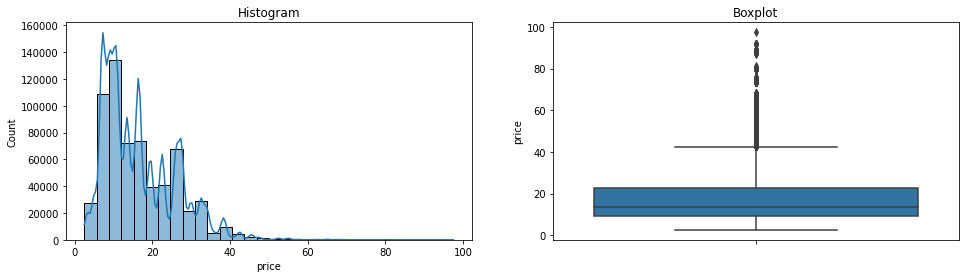


Skewness Value :  1.0457470560899256


In [79]:
diagnostic_plots(data, 'price')
print('\nSkewness Value : ', data['price'].skew())

Data jarak yang menjadi salah satu faktor penentu harga memiliki nilai dan frekuensi yang cukup beragam. Data memiliki nilai kecondongan sebesar 0.8 dan terlihat memiliki outlier pada sisi kanan.

In [56]:
# Grouping Source

data.groupby('source').size()

source
Back Bay                   57792
Beacon Hill                57403
Boston University          57764
Fenway                     57757
Financial District         58857
Haymarket Square           57736
North End                  57763
North Station              57118
Northeastern University    57756
South Station              57750
Theatre District           57813
West End                   57562
dtype: int64

Pengambilan data dilakukan di 12 titik di kota Boston.

# Data Preprocessing 

In [ ]:
# Get data for model inference

data_inf = data.sample(15, random_state=93)
data_inf

In [ ]:
# Remove inference set from dataset

data_train_test = data.drop(data_inf.index)
data_train_test

In [ ]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

## Splitting Between X (Feature) and y (Target)

In [ ]:
# Splitting between `X ` AND `y`

X = data_train_test.drop(['price'], axis=1) 
y = data_train_test['price']
X

In [32]:
# Splitting between Train-Set dengan Test-Set oleh scikit learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33) 

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (464347, 56)
Test Size:  (228709, 56)


## Handling Outlier

Text(0.5, 1.0, 'Hour on X_train')

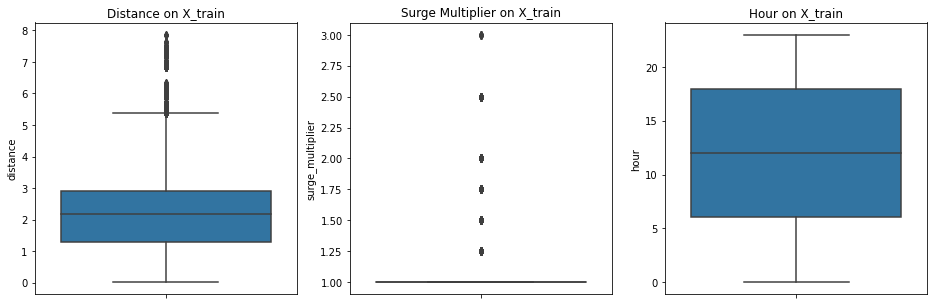

In [37]:
# distribution

plt.figure(figsize=(16, 5)) 
plt.subplot(1, 3, 1) 
sns.boxplot(y=X_train['distance'])
plt.title('Distance on X_train')

plt.subplot(1, 3, 2)
sns.boxplot(y=X_train['surge_multiplier'])
plt.title('Surge Multiplier on X_train')

plt.subplot(1, 3, 3)
sns.boxplot(y=X_train['hour'])
plt.title('Hour on X_train')


In [35]:
# Check Skewness
print('\nSkewness Value Distance : ', X_train['distance'].skew())
print('\nSkewness Value Surge Multiplier : ', X_train['surge_multiplier'].skew())
print('\nSkewness Value Hour : ', X_train['hour'].skew())



Skewness Value Distance :  0.8338157720495643

Skewness Value Surge Multiplier :  8.371791631932233

Skewness Value Hour :  -0.04461017659268149


Data `hour` pada X_train memiliki nilai kecondongan yang tergolong rendah (-0.04 > -0.5 ), data termasuk terdistribusi normal. Sementara itu untuk data `surge_multiplier` dan data `distance` tidak terdistribusi normal.

In [39]:
# Distributin - 2
# Function to create histogram and boxplot.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

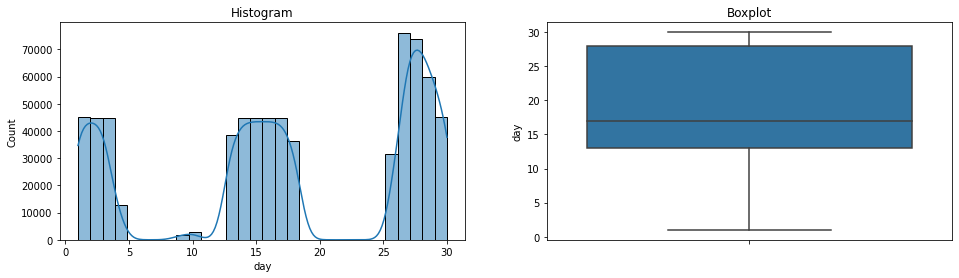


Skewness Value :  -0.3754714064429822


In [40]:
diagnostic_plots(data, 'day')
print('\nSkewness Value : ', data['day'].skew())

Pada data `day` terdapat tanggal-tanggal yang tidak tersedia. Kecondongan data masih tergolong tidak condong dengan nilai skewness -0.37. 

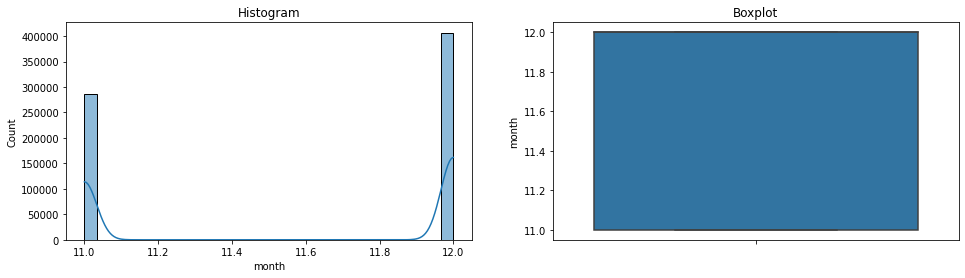


Skewness Value :  -0.3520700914475759


In [41]:
diagnostic_plots(data, 'month')
print('\nSkewness Value : ', data['month'].skew())

Data `month` hanya memiliki dua nilai bulan yaitu 11 untuk bulan November dan 12 untuk bulan Desember. Nilai skewness nya -0.35. Berdasarkan visualisasi, terlihat data `distance` dan `surge_multiplier` paling terlihat memiliki outlier.

In [52]:
# Function to find upper and lower boundaries for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [57]:
# Boundaries IQR * 1.5, for `hour` in the X_train dataset
distance_upper_boundary, distance_lower_boundary = find_skewed_boundaries(X_train, 'distance', 1.5)
distance_upper_boundary, distance_lower_boundary

# Boundaries IQR * 1.5, for `surge_multiplier` in the X_train dataset
surge_multiplier_upper_boundary, surge_multiplier_lower_boundary = find_skewed_boundaries(X_train, 'surge_multiplier', 1.5)
surge_multiplier_upper_boundary, surge_multiplier_lower_boundary

print('distance_upper_boundary : ', distance_upper_boundary)
print('distance_lower_boundary : ', distance_lower_boundary, '\n')
print('surge_multiplier_upper_boundary : ', surge_multiplier_upper_boundary)
print('surge_multiplier_lower_boundary : ', surge_multiplier_lower_boundary)


distance_upper_boundary :  5.38
distance_lower_boundary :  -1.18 

surge_multiplier_upper_boundary :  1.0
surge_multiplier_lower_boundary :  1.0


In [61]:
# Find the number and percentage of outliers for `distance` and `surge_multiplier` (skewed)

print('Total Data of Distance on X_train: {}'.format(len(X_train)))
print('Distance on X_train bigger than 5.38   : {}'.format(len(X_train[X_train['distance'] > distance_upper_boundary])))
print('% Distance on X_train bigger than 5.38 : {}'.format(len(X_train[X_train['distance'] > distance_upper_boundary])/len(X_train) * 100))
print('Distance less than -1.18 (left end outliers)  : {}'.format(len(X_train[X_train['distance'] < distance_lower_boundary])))

print('')
print('Total Data of Surge Multiplier on X_train: {}'.format(len(X_train)))
print('Surge Multiplier on X_train bigger than 1.0   : {}'.format(len(X_train[X_train['surge_multiplier'] > surge_multiplier_upper_boundary])))
print('% Surge Multiplier on X_test bigger than 1.0 : {}'.format(len(X_train[X_train['surge_multiplier'] > surge_multiplier_upper_boundary])/len(X_train) * 100))
print('Surge Multiplier less than 1.0 (left end outliers)  : {}'.format(len(X_train[X_train['surge_multiplier'] < surge_multiplier_lower_boundary])))


Total Data of Distance on X_train: 464347
Distance on X_train bigger than 5.38   : 5799
% Distance on X_train bigger than 5.38 : 1.2488505363445872
Distance less than -1.18 (left end outliers)  : 0

Total Data of Surge Multiplier on X_train: 464347
Surge Multiplier on X_train bigger than 1.0   : 13986
% Surge Multiplier on X_test bigger than 1.0 : 3.0119716505113634
Surge Multiplier less than 1.0 (left end outliers)  : 0


In [63]:
# Find out labels that only present in the training set and labels that only present in the test set on `surge_multiplier`

unique_to_train_set = [x for x in X_train.surge_multiplier.unique() if x not in X_test.surge_multiplier.unique()]
unique_to_test_set = [x for x in X_test.surge_multiplier.unique() if x not in X_train.surge_multiplier.unique()]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  0
Total unique_to_test_set  :  0


In [64]:
# Let's find out labels that only present in the training set and labels that only present in the test set on `distance`

unique_to_train_set = [x for x in X_train.distance.unique() if x not in X_test.distance.unique()]
unique_to_test_set = [x for x in X_test.distance.unique() if x not in X_train.distance.unique()]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  4
Total unique_to_test_set  :  0


Terdapat outlier pada data `surge_multiplier` dengan jumlah yang cukup banyak. Namun begitu, karena tidak ada nilai unique pada data train maupun test nya, dikhawatirkan performanya akan buruk jika harus melakukan treatment tertentu pada outlier ini. Penanganan outlier akan dilakukan untuk data `distance`.

In [67]:
# Flag the outliers in category `distance`
outliers_distance = np.where(X_train['distance'] > distance_upper_boundary, True,
                    np.where(X_train['distance'] < distance_lower_boundary, True, False))

In [68]:
# Let's trimm the dataset

X_train_trimmed = X_train.loc[~(outliers_distance)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (464347, 56)
Size dataset - After trimming  :  (458548, 56)


## Handling Missing Values

Berdasarkan informasi data pada bagian Data Loading, missing value hanya ditemukan pada nilai price yang merupakan target.

In [74]:
# Check Missing Values in `y_train`
y_train.isna().sum()

36886

In [75]:
# Check Missing Values in `y_test`
y_test.isna().sum()

18208

In [78]:
# look for rows with missing price in `y_train`
data[data['price'].isna()].iloc[:, 10:30]

,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime
18,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800
31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000
40,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800
60,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200
69,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.50,1.0,42.3519,-71.0551,50.71,50.71,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.83,3.55,4.79,1544918400,9.909,54.46,1544896800
693047,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0.91,1.0,42.3647,-71.0542,38.42,32.45,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.72,8.41,11.54,1543431600,9.915,42.61,1543438800
693049,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.79,1.0,42.3647,-71.0542,38.42,32.45,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.72,8.41,11.54,1543431600,9.915,42.61,1543438800
693060,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000


Tidak ada keterkaitan antara hilangnya nilai `price` dengan feature lainnya (Missing Completely at Random). Karena missing value terletak pada target dan akan dilakukan pemodelan regresi, untuk menangani missing values akan dilakukan imputasi data dengan median karena data memiliki nilai skewness sekitar 1.

In [81]:
# Display Value of Mean and Median Before Imputation

mean_y_train = y_train.mean()
median_y_train = y_train.median()
mean_y_test = y_test.mean()
median_y_test = y_test.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_y_train)
print('Median Value - Train Set - Before Imputation : ', median_y_train, '\n')
print('Mean Value - Test Set - Before Imputation   : ', mean_y_test)
print('Median Value - Test Set - Before Imputation : ', median_y_test)

Mean Value - Train Set - Before Imputation   :  16.541078016474017
Median Value - Train Set - Before Imputation :  13.5 

Mean Value - Test Set - Before Imputation   :  16.553537655403066
Median Value - Test Set - Before Imputation :  13.5


In [ ]:
# impute missing values with mean
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)
	

## Feature Selection

In [87]:
# Display X_train
X_train.head(10).iloc[:, 10:30]

,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow
87621,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,4.48,1.0,42.3398,-71.0892,38.60,32.72,Clear,Partly cloudy throughout the day.,0.000,0.00,0.62,8.30,11.14,1543514400,9.933,45.12,1543510800,28.54
57193,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,5.56,1.0,42.3647,-71.0542,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.000,0.00,0.73,5.31,7.20,1543431600,9.933,42.61,1543438800,37.60
111414,lyft,Lyft,1.38,1.0,42.3505,-71.1054,40.38,35.18,Partly Cloudy,Light rain in the morning.,0.000,0.00,0.71,7.73,11.57,1543305600,10.000,46.74,1543320000,33.82
123031,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2.88,1.0,42.3588,-71.0707,36.53,32.06,Mostly Cloudy,Mostly cloudy throughout the day.,0.000,0.00,0.71,5.42,6.95,1543431600,9.974,42.61,1543438800,37.64
548047,lyft_line,Shared,1.25,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.000,0.00,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71
32409,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1.61,1.0,42.3519,-71.0551,43.00,37.07,Partly Cloudy,Partly cloudy throughout the day.,0.000,0.00,0.54,10.72,14.22,1543514400,9.931,44.76,1543510800,28.78
357946,lyft_luxsuv,Lux Black XL,0.56,1.0,42.3505,-71.1054,54.59,54.59,Mostly Cloudy,Foggy in the morning.,0.000,0.00,0.63,9.43,15.07,1543856400,10.000,56.89,1543852800,33.73
306373,lyft,Lyft,3.49,1.0,42.3429,-71.1003,42.81,38.23,Overcast,Rain throughout the day.,0.002,0.29,0.75,7.54,8.94,1545015600,9.956,43.63,1544990400,34.00
476860,lyft_premier,Lux,0.44,1.0,42.3505,-71.1054,41.40,41.40,Foggy,"Rain until morning, starting again in the eve...",0.000,0.00,0.92,1.81,1.81,1543287600,0.965,46.39,1543255200,42.15
413069,lyft_premier,Lux,3.43,1.0,42.3505,-71.1054,41.60,39.31,Overcast,Partly cloudy throughout the day.,0.000,0.00,0.81,3.84,3.84,1544846400,9.768,46.70,1544814000,40.93


Berdasarkan informasi yang diperoleh dari website Lyft dan Uber, dapat dikatakan bahwa hal yang mempengaruhi harga pada layanan mereka dan terdapat pada feature adalah jenis layanan yang digunakan (diwakili dengan `name`), jarak (diwakili `distance`), surge pricing (diwakili `surge_multiplier`).  

In [88]:
# Selecting unused columns
unused_columns = ["id","datetime", "product_id", "timestamp", "latitude", "longitude", "long_summary", "precipIntensity",	"precipProbability", "temperatureHigh",	"temperatureHighTime",	"temperatureLow",	"temperatureMin",	"temperatureMinTime",	"temperatureMax",	"temperatureMaxTime",	"apparentTemperatureMin",	"apparentTemperatureMinTime",	"apparentTemperatureMax",	"apparentTemperatureMaxTime"]

In [ ]:
# Drop column name
X_train.drop(unused_columns, axis=1, inplace=True)
X_test.drop(unused_columns, axis=1, inplace=True)
X_train.head(5)

In [92]:
unused_columns2 = ["ozone",	"moonPhase", "visibility.1",	"precipIntensityMax",	"uvIndexTime", "temperatureLowTime",	"apparentTemperatureHigh",	"apparentTemperatureHighTime",	"apparentTemperatureLow",	"apparentTemperatureLowTime",	"icon",	"dewPoint"]

In [93]:
# Drop column name
X_train.drop(unused_columns2, axis=1, inplace=True)
X_test.drop(unused_columns2, axis=1, inplace=True)
X_train

In [109]:

data.groupby('name').size()

name
Black           55095
Black SUV       55096
Lux             51235
Lux Black       51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Shared          51233
Taxi            55095
UberPool        55091
UberX           55094
UberXL          55096
WAV             55096
dtype: int64

## Split between Numerical columns and Categorical Columns

In [116]:
# Get Numerical columns and Categorical Column

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature', 'apparentTemperature', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'sunriseTime', 'sunsetTime']
Categorical Columns:  ['timezone', 'source', 'destination', 'cab_type', 'name', 'short_summary']


In [117]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,humidity,windSpeed,windGust,windGustTime,visibility,pressure,windBearing,cloudCover,uvIndex,sunriseTime,sunsetTime
87621,0,30,11,4.48,1.0,38.60,32.72,0.62,8.30,11.14,1543514400,9.933,1010.96,319,0.12,0,1543492406,1543526105
57193,11,28,11,5.56,1.0,35.54,30.98,0.73,5.31,7.20,1543431600,9.933,991.07,270,0.76,0,1543405936,1543439716
111414,23,27,11,1.38,1.0,40.38,35.18,0.71,7.73,11.57,1543305600,10.000,991.84,252,0.13,0,1543319478,1543353358
123031,12,28,11,2.88,1.0,36.53,32.06,0.71,5.42,6.95,1543431600,9.974,991.36,261,0.54,0,1543405939,1543439721
548047,3,29,11,1.25,1.0,37.44,30.88,0.70,9.14,9.14,1543446000,10.000,998.36,303,0.44,0,1543405904,1543439738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196665,14,15,12,0.63,1.0,47.95,46.74,0.88,3.70,5.10,1544918400,9.707,1022.57,215,0.99,1,1544875681,1544908425
158921,20,27,11,0.55,1.0,43.02,37.56,0.69,9.55,11.74,1543338000,10.000,991.00,256,0.82,0,1543319468,1543353343
223890,14,2,12,1.91,1.0,43.51,39.58,0.96,6.60,8.47,1543755600,2.644,1015.25,117,1.00,1,1543751797,1543785238
393794,8,30,11,2.66,1.0,30.09,30.09,0.85,2.25,2.25,1543554000,9.864,1014.80,307,0.00,0,1543578865,1543612473


## Feature Scaling

In [102]:
# Feature Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.        , 1.        , 0.        , ..., 0.        , 0.1739386 ,
        0.17386836],
       [0.47826087, 0.93103448, 0.        , ..., 0.        , 0.13045282,
        0.13039297],
       [1.        , 0.89655172, 0.        , ..., 0.        , 0.08697307,
        0.08693318],
       ...,
       [0.60869565, 0.03448276, 1.        , ..., 0.5       , 0.3043864 ,
        0.30427744],
       [0.34782609, 1.        , 0.        , ..., 0.        , 0.21741885,
        0.21733319],
       [0.30434783, 0.        , 1.        , ..., 0.        , 0.26090363,
        0.26080405]])

## Feature Encoding

In [118]:
# Display X_train_cat

X_train_cat

,timezone,source,destination,cab_type,name,short_summary
87621,America/New_York,Financial District,Fenway,Uber,UberX,Clear
57193,America/New_York,Financial District,Boston University,Uber,Taxi,Mostly Cloudy
111414,America/New_York,Beacon Hill,Haymarket Square,Lyft,Lyft,Partly Cloudy
123031,America/New_York,Northeastern University,West End,Uber,Taxi,Mostly Cloudy
548047,America/New_York,Haymarket Square,Theatre District,Lyft,Shared,Partly Cloudy
...,...,...,...,...,...,...
196665,America/New_York,South Station,Financial District,Uber,Black SUV,Overcast
158921,America/New_York,Theatre District,South Station,Uber,Black SUV,Mostly Cloudy
223890,America/New_York,North End,Beacon Hill,Lyft,Lyft,Light Rain
393794,America/New_York,Fenway,Theatre District,Uber,Black SUV,Clear


In [121]:
# Feature Encoding using OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train_cat)

OneHotEncoder()

In [ ]:
# Encoded feature to array
X_train_cat_encoded = enc.transform(X_train_cat).toarray()
X_test_cat_encoded = enc.transform(X_test_cat).toarray()
X_train_cat_encoded

In [153]:
# Get Feature Names 
enc.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_America/New_York', 'x1_Back Bay', 'x1_Beacon Hill',
       'x1_Boston University', 'x1_Fenway', 'x1_Financial District',
       'x1_Haymarket Square', 'x1_North End', 'x1_North Station',
       'x1_Northeastern University', 'x1_South Station',
       'x1_Theatre District', 'x1_West End', 'x2_Back Bay',
       'x2_Beacon Hill', 'x2_Boston University', 'x2_Fenway',
       'x2_Financial District', 'x2_Haymarket Square', 'x2_North End',
       'x2_North Station', 'x2_Northeastern University',
       'x2_South Station', 'x2_Theatre District', 'x2_West End',
       'x3_Lyft', 'x3_Uber', 'x4_Black', 'x4_Black SUV', 'x4_Lux',
       'x4_Lux Black', 'x4_Lux Black XL', 'x4_Lyft', 'x4_Lyft XL',
       'x4_Shared', 'x4_Taxi', 'x4_UberPool', 'x4_UberX', 'x4_UberXL',
       'x4_WAV', 'x5_ Clear ', 'x5_ Drizzle ', 'x5_ Foggy ',
       'x5_ Light Rain ', 'x5_ Mostly Cloudy ', 'x5_ Overcast ',
       'x5_ Partly Cloudy ', 'x5_ Possible Drizzle ', 'x5_ Rain '],
      dtype=object)

In [ ]:
enc.get_feature_names(X_train_cat.columns)

In [ ]:
enc.get_feature_names(X_test_cat.columns)

In [168]:
X_train_cat.columns

Index(['timezone', 'source', 'destination', 'cab_type', 'name',
       'short_summary'],
      dtype='object')

In [ ]:
X_test_cat.columns

In [169]:
X_train_cat_cols = X_train_cat[['timezone', 'source', 'destination', 'cab_type', 'name', 'short_summary']]
X_test_cat_cols = X_test_cat[['timezone', 'source', 'destination', 'cab_type', 'name','short_summary']]
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat_encoded2 = enc.fit_transform(X_train_cat_cols)
X_train_cat_encoded2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [172]:
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded2,
                                      columns=enc.get_feature_names(X_train_cat_cols.columns),
                                      index=X_train_cat_cols.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,
                                      columns=enc.get_feature_names(X_test_cat_cols.columns),
                                      index=X_test_cat_cols.index)
X_train_cat_encoded_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,timezone_America/New_York,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
87621,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57193,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
111414,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
123031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
548047,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
158921,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
393794,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
cat_columns2 = X_train_cat_encoded_df.columns.tolist()
print('Categorical Columns : ', cat_columns2)

Categorical Columns :  ['timezone_America/New_York', 'source_Back Bay', 'source_Beacon Hill', 'source_Boston University', 'source_Fenway', 'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End', 'destination_Back Bay', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 'destination_Theatre District', 'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'short_summary_ Clear ', 'short_summary_ Drizzle ', 'short_summary_ Foggy '

In [175]:
cat_columns3 = X_test_cat_encoded_df.columns.tolist()
print('Categorical Columns : ', cat_columns3)

Categorical Columns :  ['timezone_America/New_York', 'source_Back Bay', 'source_Beacon Hill', 'source_Boston University', 'source_Fenway', 'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End', 'destination_Back Bay', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 'destination_Theatre District', 'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'short_summary_ Clear ', 'short_summary_ Drizzle ', 'short_summary_ Foggy '

## Concate between Numerical Columns and Categorical Columns

In [191]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded2], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47826087, 0.93103448, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.89655172, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.60869565, 0.03448276, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34782609, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30434783, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [192]:
# Create data frame of X_train_final

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns2])
X_train_final_df

,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,humidity,windSpeed,windGust,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.000000,1.000000,0.0,0.568878,0.0,0.513965,0.456642,0.413793,0.539519,0.390926,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.478261,0.931034,0.0,0.706633,0.0,0.434090,0.418053,0.603448,0.334021,0.241966,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.000000,0.896552,0.0,0.173469,0.0,0.560428,0.511200,0.568966,0.500344,0.407183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.521739,0.931034,0.0,0.364796,0.0,0.459932,0.442005,0.568966,0.341581,0.232514,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.130435,0.965517,0.0,0.156888,0.0,0.483686,0.415835,0.551724,0.597251,0.315312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464342,0.608696,0.482759,1.0,0.077806,0.0,0.758027,0.767576,0.862069,0.223368,0.162571,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
464343,0.869565,0.896552,0.0,0.067602,0.0,0.629340,0.563983,0.534483,0.625430,0.413611,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
464344,0.608696,0.034483,1.0,0.241071,0.0,0.642130,0.608782,1.000000,0.422680,0.289981,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
464345,0.347826,1.000000,0.0,0.336735,0.0,0.291830,0.398314,0.810345,0.123711,0.054820,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# Create data frame of X_test_final

X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns3])
X_test_final_df

,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,humidity,windSpeed,windGust,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.000000,0.482759,1.0,0.577806,0.0,0.592274,0.602794,0.741379,0.232990,0.114934,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.043478,0.068966,1.0,0.306122,0.0,0.757505,0.793968,0.982759,0.154639,0.106616,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.565217,1.000000,0.0,0.047194,0.0,0.336466,0.436239,0.775862,0.113402,0.150851,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.913043,0.068966,1.0,0.359694,0.0,0.822762,0.849412,0.206897,0.464605,0.360302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.652174,1.000000,0.0,0.309949,0.0,0.545027,0.562431,0.413793,0.214433,0.130057,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228704,0.913043,0.931034,0.0,0.200255,0.0,0.585748,0.520958,0.379310,0.607560,0.408318,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
228705,0.565217,0.931034,0.0,0.089286,0.0,0.445576,0.419162,0.551724,0.375945,0.193573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
228706,0.130435,0.103448,1.0,0.099490,0.0,0.685200,0.640275,0.379310,0.500344,0.424197,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
228707,0.000000,0.448276,1.0,0.413265,0.0,0.322109,0.424041,0.448276,0.149141,0.103592,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model Definition

In [195]:
# Linear Regression
model_lin_reg = LinearRegression(fit_intercept=True, )

# Model Training

In [196]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# Model Evaluation

In [197]:
# Predict Train-Set and Test-Set 

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([15.67767334, 22.60365295,  6.59373474, ...,  8.29794312,
       31.53866577,  5.13018799])

In [198]:
# Model Evaluation using MAE, MSE, RMSE, R2 Score
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  1.796188277164279
MAE test =  1.8008256626227144
MSE train =  6.488931326980962
MSE test =  6.554181387761095
RMSE train =  2.5473380865093196
RMSE test =  2.560113549778817
r2score train =  0.9194649151885507
r2score test =  0.9190763234745413


# Model Inference

In [199]:
# Save the Files

import joblib
import json

with open('model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_enc.pkl', 'wb') as file_3:
  joblib.dump(enc, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

In [200]:
# Load All Files

import joblib
import json

with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_enc.pkl', 'rb') as file_3:
  model_enc = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

In [201]:
# Display Inference Set

data_inf.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,90b7bb1e-1363-4a5e-8e74-174d837455d2,1.545059e+09,15,17,12,2018-12-17 15:10:12,America/New_York,Haymarket Square,Financial District,Lyft,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
1,3230804a-a4a5-4d69-9fd6-a5d9e2e1cdb6,1.543531e+09,22,29,11,2018-11-29 22:37:56,America/New_York,South Station,West End,Lyft,...,0.0000,1543510800,35.07,1543550400,44.68,1543510800,30.92,1543550400,38.34,1543510800
2,69b3d722-5977-4017-a219-2560981483c2,1.543830e+09,9,3,12,2018-12-03 09:38:05,America/New_York,Fenway,West End,Uber,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,3d579ed2-c5aa-4751-8760-32388b4c9834,1.545022e+09,4,17,12,2018-12-17 04:50:03,America/New_York,Boston University,West End,Uber,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
4,071b733e-8585-47b8-b11f-aba8cd160e69,1.544872e+09,11,15,12,2018-12-15 11:00:03,America/New_York,Fenway,North Station,Uber,...,0.0075,1544893200,39.78,1544929200,54.40,1544896800,36.64,1544929200,53.73,1544896800
5,768000e3-74d9-4444-b1a2-0d50b46f323f,1.543882e+09,0,4,12,2018-12-04 00:13:01,America/New_York,Haymarket Square,North Station,Lyft,...,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
6,a7fe4559-724d-4bb0-aebd-4ea1a32fd6fa,1.543543e+09,1,30,11,2018-11-30 01:53:02,America/New_York,North Station,South Station,Lyft,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
7,64fa339b-9571-4765-b5e2-3641c292ae4c,1.543601e+09,18,30,11,2018-11-30 18:08:02,America/New_York,North Station,Boston University,Uber,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
8,4b1b382d-f89f-4435-9e8b-e189ab1c6823,1.543494e+09,12,29,11,2018-11-29 12:22:58,America/New_York,Haymarket Square,Financial District,Lyft,...,0.0000,1543510800,35.07,1543550400,44.68,1543510800,30.92,1543550400,38.34,1543510800
9,524538f0-d8f2-4ae2-863f-215b5ac87a24,1.543426e+09,17,28,11,2018-11-28 17:26:08,America/New_York,North Station,South Station,Uber,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800


In [202]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[data_inf.select_dtypes(include=np.number).columns.tolist()]
data_inf_cat = data_inf[data_inf.select_dtypes(include=['object']).columns.tolist()]

data_inf_num.head(5)

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.545059e+09,15,17,12,3.5,1.01,1.0,42.3519,-71.0551,36.87,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
1,1.543531e+09,22,29,11,19.5,2.05,1.0,42.3644,-71.0661,40.39,...,0.0000,1543510800,35.07,1543550400,44.68,1543510800,30.92,1543550400,38.34,1543510800
2,1.543830e+09,9,3,12,9.0,2.72,1.0,42.2148,-71.0330,48.11,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,1.545022e+09,4,17,12,10.5,3.04,1.0,42.2148,-71.0330,40.08,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
4,1.544872e+09,11,15,12,8.5,3.07,1.0,42.3647,-71.0542,47.34,...,0.0075,1544893200,39.78,1544929200,54.40,1544896800,36.64,1544929200,53.73,1544896800


In [203]:
# Feature Scaling and Feature Encoding
scal = MinMaxScaler()
data_inf_num_scaled = scal.fit_transform(data_inf_num)
ohe = OneHotEncoder()
data_inf_cat_encoded = ohe.fit_transform(data_inf_cat)

data_inf_num_scaled

array([[0.95846005, 0.68181818, 0.55172414, 1.        , 0.        ,
        0.17028986, 0.        , 0.90614673, 0.69475138, 0.50917031,
        0.52753873, 0.02673797, 0.07      , 0.83333333, 0.4214939 ,
        0.25877012, 0.93842887, 0.94443695, 0.34463502, 0.95188285,
        0.15342052, 0.95218295, 0.38423645, 0.95188285, 0.        ,
        0.9623431 , 0.6428766 , 0.27080971, 1.        , 1.        ,
        1.        , 0.94443695, 0.57112299, 0.95000798, 0.9499884 ,
        0.13846154, 0.13714734, 0.95010395, 0.55296503, 0.91767068,
        0.16852227, 0.98060345, 0.58342304, 0.94813278, 0.15808241,
        0.98060345],
       [0.06167445, 1.        , 0.96551724, 0.        , 0.64      ,
        0.54710145, 0.        , 0.98876404, 0.54281768, 0.6628821 ,
        0.6087206 , 0.        , 0.        , 0.14285714, 0.625     ,
        0.50226991, 0.04883227, 0.99042481, 0.47387316, 0.041841  ,
        0.39034205, 0.04989605, 0.45349174, 0.041841  , 0.57516829,
        0.05230126, 0.46172

In [204]:
data_inf_num_scaled.shape

(15, 46)

In [205]:
data_inf_cat_encoded.shape

(15, 83)